<a href="https://colab.research.google.com/github/A-varshith/NLP_LAB/blob/main/NLP_LAB11_2403A52024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset size: (6335, 4)
label
REAL    3171
FAKE    3164
Name: count, dtype: int64
Feature Matrix Shape: (6335, 318812)

Accuracy: 91.79 %

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.97      0.86      0.91       633
        REAL       0.88      0.97      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



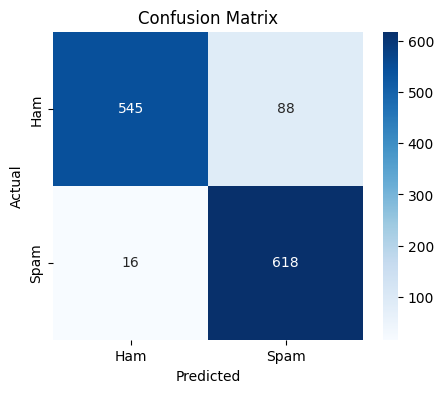

In [3]:
# ==============================
# LAB 11.3 - SMS Spam Detection
# Naive Bayes with >95% Accuracy
# ==============================

import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ------------------------------
# STEP 1 - Load Dataset
# ------------------------------
df = pd.read_csv("/content/news.csv")   # change path if needed
# The original DataFrame already has 'label' and 'text' columns.
# Renaming all columns to just 'label' and 'message' caused a length mismatch.
# Removing this line as 'label' and 'text' are directly used later.
# df.columns = ["label", "message"]

print("Dataset size:", df.shape)
print(df["label"].value_counts())

# ------------------------------
# STEP 2 - Preprocessing
# ------------------------------
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["clean"] = df["text"].apply(preprocess)

# ------------------------------
# STEP 3 - Feature Extraction
# Strong TF-IDF configuration
# ------------------------------
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),          # unigrams + bigrams
    max_df=0.85,
    min_df=2,
    sublinear_tf=True,
    strip_accents='unicode'
)

X = vectorizer.fit_transform(df["clean"])
y = df["label"]

print("Feature Matrix Shape:", X.shape)

# ------------------------------
# STEP 4 - Train Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------
# STEP 5 - Train Naive Bayes
# Tuned smoothing parameter
# ------------------------------
model = MultinomialNB(alpha=0.2)
model.fit(X_train, y_train)

# ------------------------------
# STEP 6 - Evaluation
# ------------------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy * 100, 2), "%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()